In [22]:
from sklearn import datasets
patients=datasets.load_breast_cancer()

In [23]:
print(patients.data.shape)
print(patients.target.shape)

(569, 30)
(569,)


In [24]:
import pandas as pd
data_pd=pd.DataFrame(patients.data, columns=[patients.feature_names])
data_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [26]:
import numpy as np
benign=np.count_nonzero(patients.target==1)
malignant=np.count_nonzero(patients.target==0)
print(f"Liczba komórek oznaczonych jako Benign (łagodne): {benign}")
print(f"Liczba komórek oznaczonych jako Malignant (złośliwe): {malignant}")
print("\n")
print(f"% komórek oznaczonych jako Benign (łagodne): {round(benign/len(patients.target)*100, 2)}%")
print(f"% komórek oznaczonych jako Malignant (złośliwe): {round(malignant/len(patients.target)*100, 2)}%")

Liczba komórek oznaczonych jako Benign (łagodne): 357
Liczba komórek oznaczonych jako Malignant (złośliwe): 212


% komórek oznaczonych jako Benign (łagodne): 62.74%
% komórek oznaczonych jako Malignant (złośliwe): 37.26%


([<matplotlib.axis.XTick at 0x1caa0d08890>,
 [Text(0, 0, 'Malignant (złośliwy)'), Text(1, 0, 'Benign (łagodny)')])

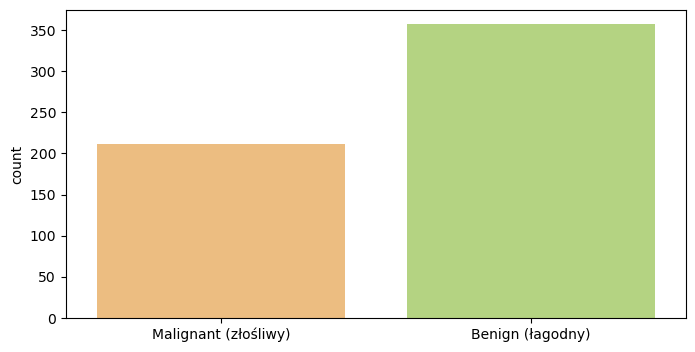

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x="target", data=patients, palette="RdYlGn")
new_labels = ["Malignant (złośliwy)", "Benign (łagodny)"]
plt.xticks(ticks=[0, 1], labels=new_labels)

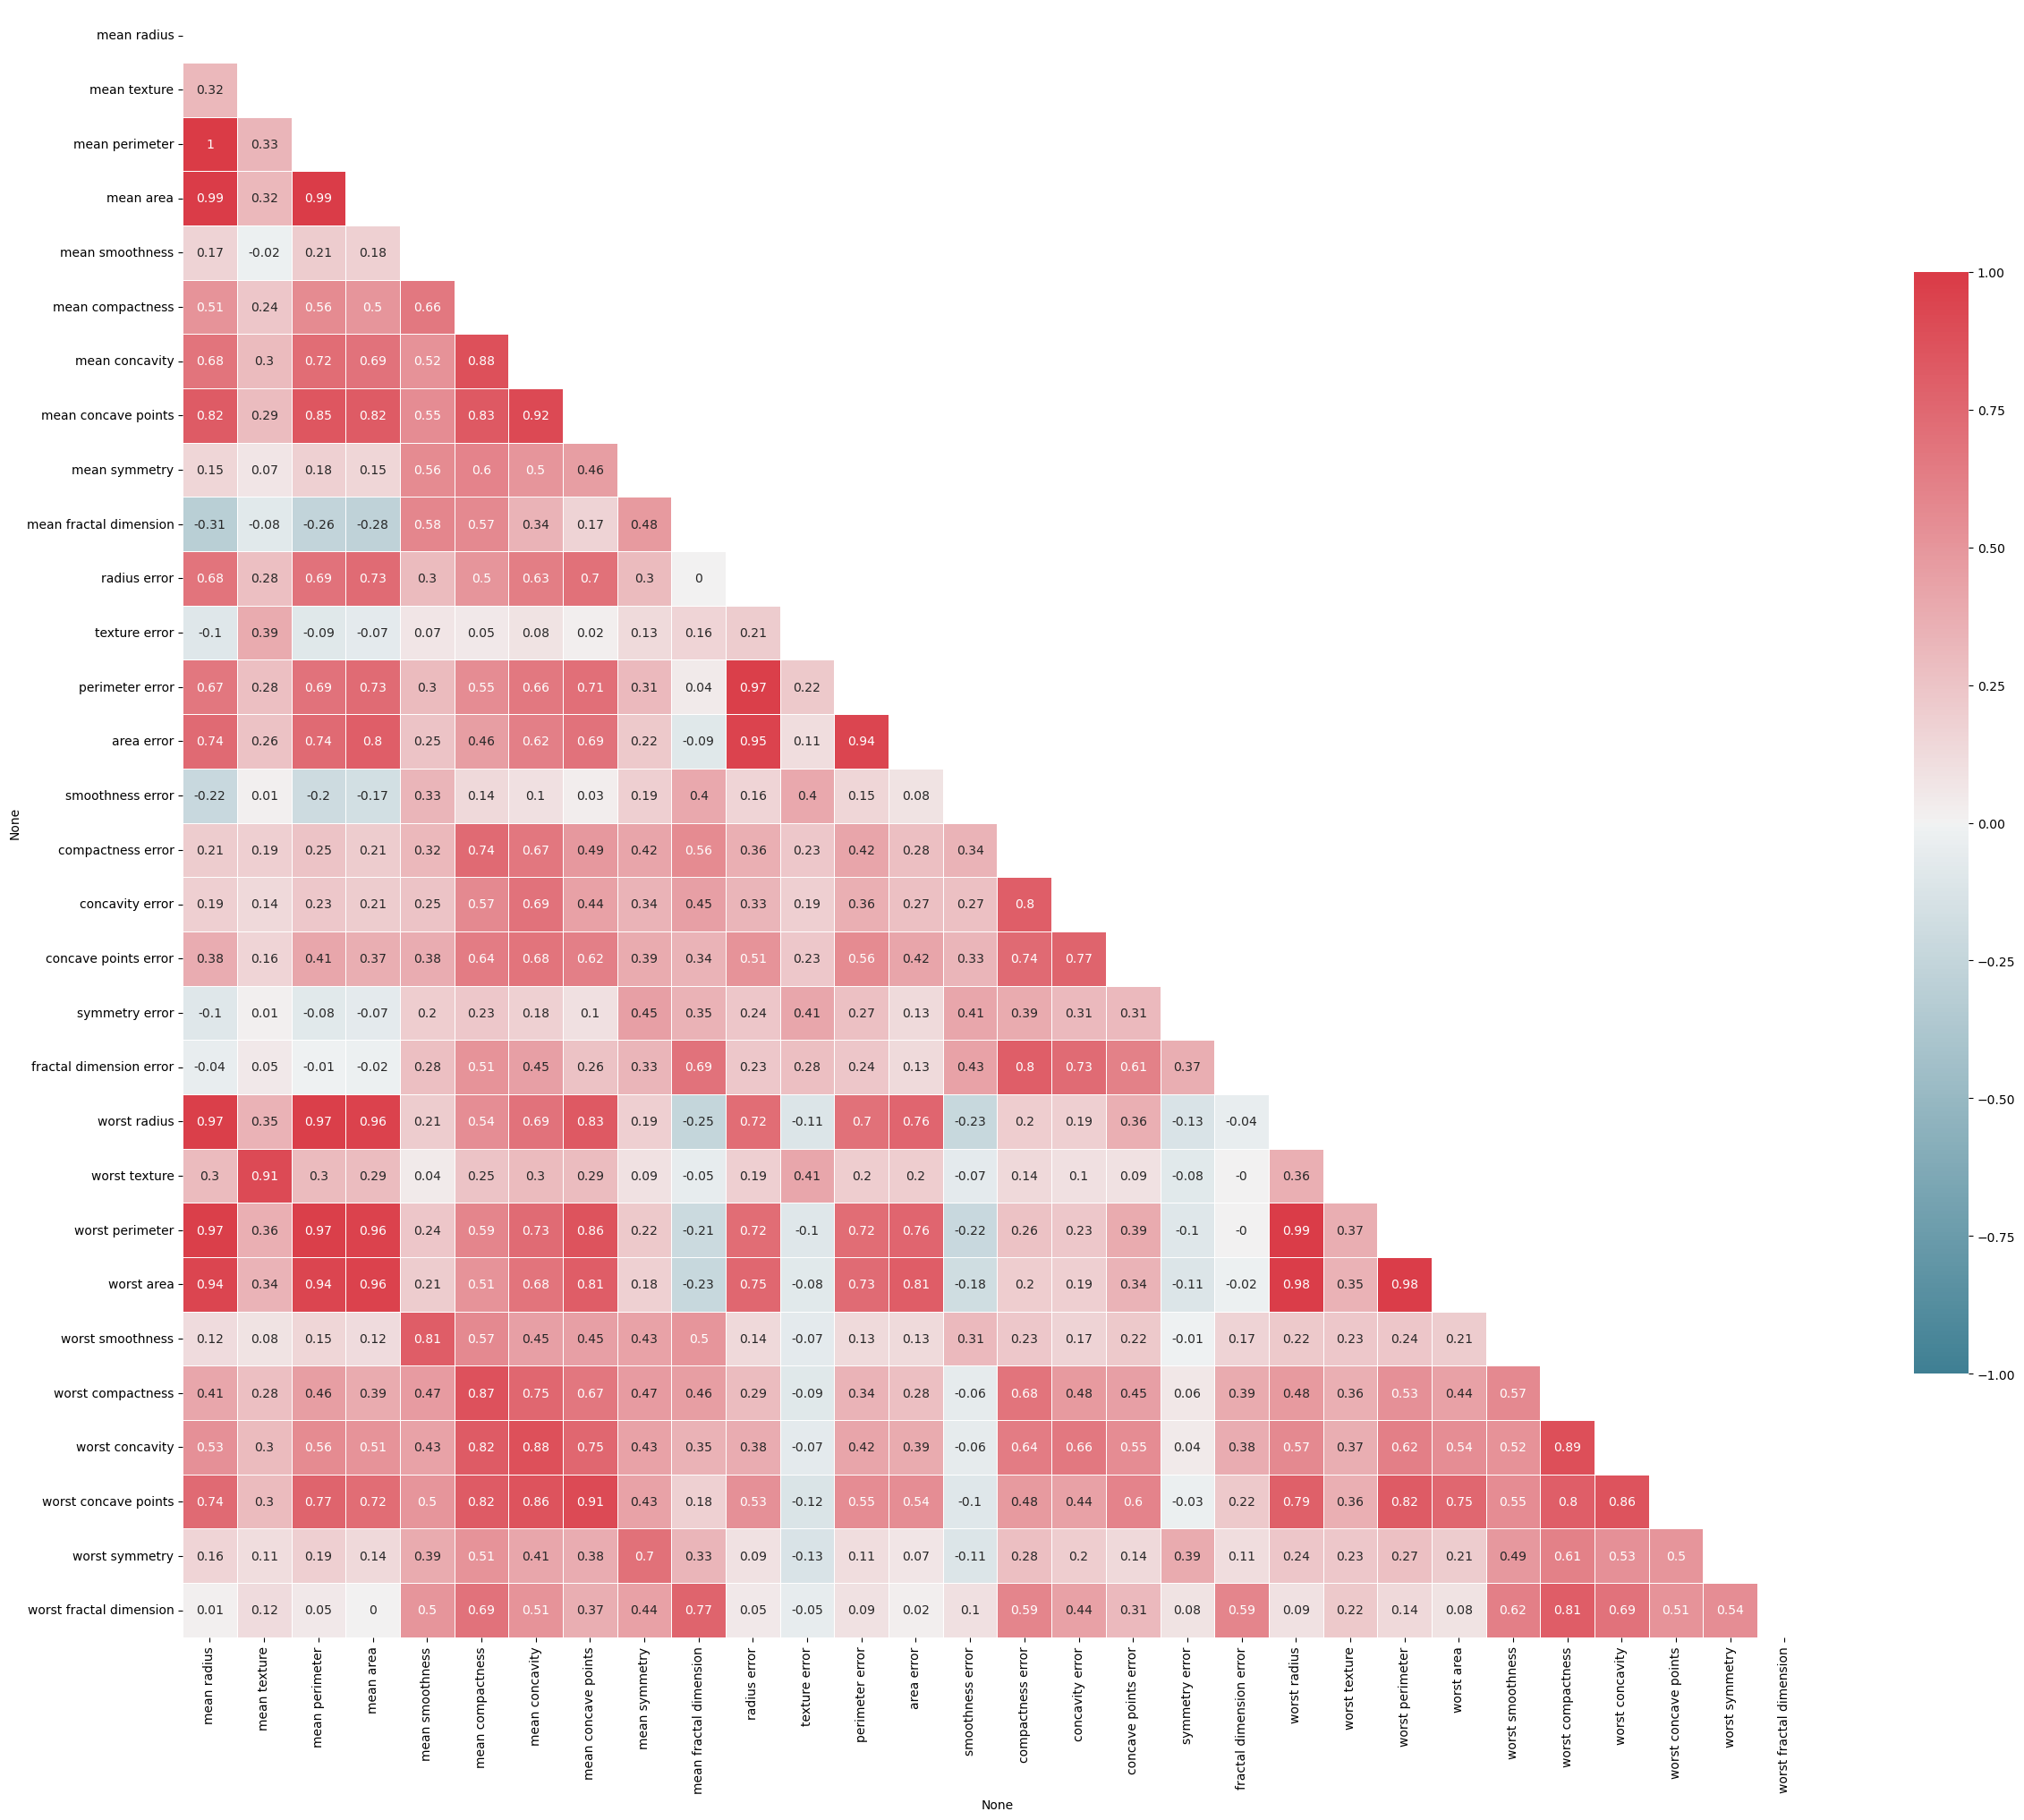

In [28]:
corr = data_pd.corr().round(2)
mask=np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(25,25))
cmap=sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)
plt.tight_layout()

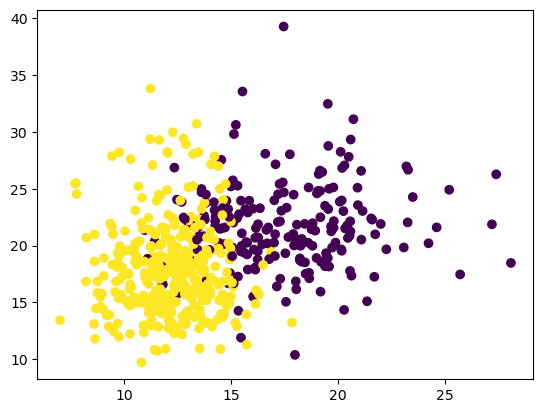

In [29]:
plt.scatter(patients.data[:,0], patients.data[:,1], c=patients.target)

In [30]:
print(patients["data"][1,:])

[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]


In [31]:
print("mean")
print(patients["data"].mean(axis=0))
print("\n")
print("std")
print(patients["data"].std(axis=0))

mean
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]


std
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(patients.data)
print(scaled_data[1,:])
print("mean")
print(scaled_data.mean(axis=0))
print("\n")
print("std")
print(scaled_data.std(axis=0))

[ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
 -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
  1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
  2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
 -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
  1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
 -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
 -2.43889668e-01  2.81189987e-01]
mean
[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]


std
[1. 1. 1. 1

In [33]:
from sklearn.model_selection import train_test_split
patients_train_data, patients_test_data, patients_train_target, patients_test_target = train_test_split(scaled_data, patients.target, test_size=0.1)
print("Training dataset:")
print(f"patients_train_data: {patients_train_data.shape}")
print(f"patients_train_target: {patients_train_target.shape}")
print("\n")
print("Training dataset:")
print(f"patients_test_data: {patients_test_data.shape}")
print(f"patients_test_target: {patients_test_target.shape}")

Training dataset:
patients_train_data: (512, 30)
patients_train_target: (512,)


Training dataset:
patients_test_data: (57, 30)
patients_test_target: (57,)


In [34]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(patients_train_data, patients_train_target)

LogisticRegression()

In [35]:
import random
id=random.randint(0,56)
prediction=logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")
print("\n")
id=random.randint(0,56)
prediction=logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")
print("\n")
id=random.randint(0,56)
prediction=logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")
print("\n")
id=random.randint(0,56)
prediction=logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")
print("\n")
id=random.randint(0,56)
prediction=logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")
print("\n")

Model predicted for patient 53 value [0]
Real value for patient "53" is 0


Model predicted for patient 12 value [1]
Real value for patient "12" is 1


Model predicted for patient 36 value [0]
Real value for patient "36" is 0


Model predicted for patient 7 value [0]
Real value for patient "7" is 0


Model predicted for patient 47 value [0]
Real value for patient "47" is 0




In [36]:
prediction_probability=logistic_regression.predict_proba(patients_test_data[id,:].reshape(1,-1))
print(f"Prediction probability: {prediction_probability}")

Prediction probability: [[9.99996308e-01 3.69150812e-06]]


In [17]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(patients_test_target, logistic_regression.predict(patients_test_data))
print(f"Model accuracy is {acc}")

Model accuracy is 0.9824561403508771


In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(patients_test_target, logistic_regression.predict(patients_test_data))
true_negative=conf_matrix[0][0]
false_positive=conf_matrix[0][1]
false_negative=conf_matrix[1][0]
true_positive=conf_matrix[1][1]
print("Confusion Matrix:")
print("\n")
print(conf_matrix)
print("\n")
print("True Negative: ", true_negative)
print("False Positive: ", false_positive)
print("False Negative: ", false_negative)
print("True Positive: ", true_positive)
print("Correct Predictions", round((true_negative+true_positive)/(true_negative+true_positive+false_negative+false_positive)*100,1), "%")

Confusion Matrix:


[[18  1]
 [ 0 38]]


True Negative:  18
False Positive:  1
False Negative:  0
True Positive:  38
Correct Predictions 98.2 %


In [19]:
from sklearn.model_selection import cross_val_score
for a in range(2,7):
    scores=cross_val_score(LogisticRegression(), patients_test_data, patients_test_target, cv=a)
    print(f"Mean value score for a= {a} is {scores.mean():.2f}")

Mean value score for a= 2 is 0.95
Mean value score for a= 3 is 0.95
Mean value score for a= 4 is 0.97
Mean value score for a= 5 is 0.93
Mean value score for a= 6 is 0.95


In [20]:
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6]
yMean=[]
yScore=[]
for a in range(1,7):
    pt=PolynomialFeatures(a, )
    patients_train_poly = pt.fit_transform(patients_train_data)
    patients_test_poly = pt.fit_transform(patients_test_data)
    lr_poly=LogisticRegression()
    lr_poly.fit(patients_train_poly, patients_train_target)
    print(f"{a} degree")
    print(f"squared error: %.2f" % mean_squared_error(patients_test_target, lr_poly.predict(patients_test_poly)))
    print("variance score: %.2f" % lr_poly.score(patients_test_poly, patients_test_target))
    yMean.append(mean_squared_error(patients_test_target, lr_poly.predict(patients_test_poly)))
    yScore.append(lr_poly.score(patients_test_poly, patients_test_target))

1 degree
squared error: 0.02
variance score: 0.98
2 degree
squared error: 0.05
variance score: 0.95
3 degree
squared error: 0.04
variance score: 0.96


C:\Users\dell\miniconda3\envs\firstenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 degree
squared error: 0.02
variance score: 0.98


C:\Users\dell\miniconda3\envs\firstenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 degree
squared error: 0.04
variance score: 0.96


C:\Users\dell\miniconda3\envs\firstenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6 degree
squared error: 0.05
variance score: 0.95
